In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sympy import *
import math
from scipy import signal as sig
sns.set_style("whitegrid")

In [4]:
%matplotlib inline
#%matplotlib widget 
#Trocar conforme necessário

In [5]:
users_exp = pd.read_pickle("users.dat")

In [6]:
user1_1, user1_2, user2_1, user2_2, user3_1, user3_2, user4_1, user4_2 = users_exp

In [117]:
def plot_with_labels(upxvalues, downxvalues, up, down, user, index):
    ## index -- numero da experiência, de modo a imprimir o Numero do Sujeito, bem como da sua experiência
    ## upxvalues -- ordenadas para impressão de up (labels a colocar em cima)
    ## downxvalues -- ordenadas para impressão de down (labels a colocar em baixo)
    ## user -- dataFrame com os dados do user a imprimir.
    figure, subplots = plt.subplots(nrows=3, ncols=1, figsize=(16,8))
    figure.suptitle(f"Valores Obtidos Pelo Acelerómetro na Experiência {index%2+1} do Sujeito {index//2+1}", fontsize = 'xx-large')
    
    subplots[0].plot( user['Time (min)'], user['X'], lw = 0.3)
    subplots[0].set_xlabel("Time (min)")
    subplots[0].set_ylabel("ACC_X")
    subplots[0].set_xlim(0, max(user['Time (min)']))
    
    subplots[1].plot( user['Time (min)'], user['Y'], lw = 0.3)
    subplots[1].set_xlabel("Time (min)")
    subplots[1].set_ylabel("ACC_Y")
    subplots[1].set_xlim(0, max(user['Time (min)']))
    
    subplots[2].plot( user['Time (min)'], user['Z'], lw = 0.3)
    subplots[2].set_xlabel("Time (min)")
    subplots[2].set_ylabel("ACC_Z")
    subplots[2].set_xlim(0, max(user['Time (min)']))
    
    xmin,xmax = subplots[0].get_xlim()
    
    
    for i in range(len(upxvalues)):
        yv = 0.95 if i%2==0 else 0.90
        frase = up[i]
        xv = upxvalues[i]/xmax
        
        subplots[0].annotate(xycoords = 'axes fraction', text = frase, xy = (xv,yv), textcoords = subplots[0].transAxes, xytext = (xv,yv), fontweight='bold')
        subplots[1].annotate(xycoords = 'axes fraction', text = frase, xy = (xv,yv), textcoords = subplots[1].transAxes, xytext = (xv,yv), fontweight='bold')
        subplots[2].annotate(xycoords = 'axes fraction', text = frase, xy = (xv,yv), textcoords = subplots[2].transAxes, xytext = (xv,yv), fontweight='bold')
        
    yv = 0.01 
    for i in range(len(downxvalues)):
        frase = down[i]
        xv = downxvalues[i]/xmax
        
        subplots[0].annotate(xycoords = 'axes fraction', text = frase, xy = (xv,yv), textcoords = subplots[0].transAxes, xytext = (xv,yv), fontweight='bold')
        subplots[1].annotate(xycoords = 'axes fraction', text = frase, xy = (xv,yv), textcoords = subplots[1].transAxes, xytext = (xv,yv), fontweight='bold')
        subplots[2].annotate(xycoords = 'axes fraction', text = frase, xy = (xv,yv), textcoords = subplots[2].transAxes, xytext = (xv,yv), fontweight='bold')
    figure.tight_layout()

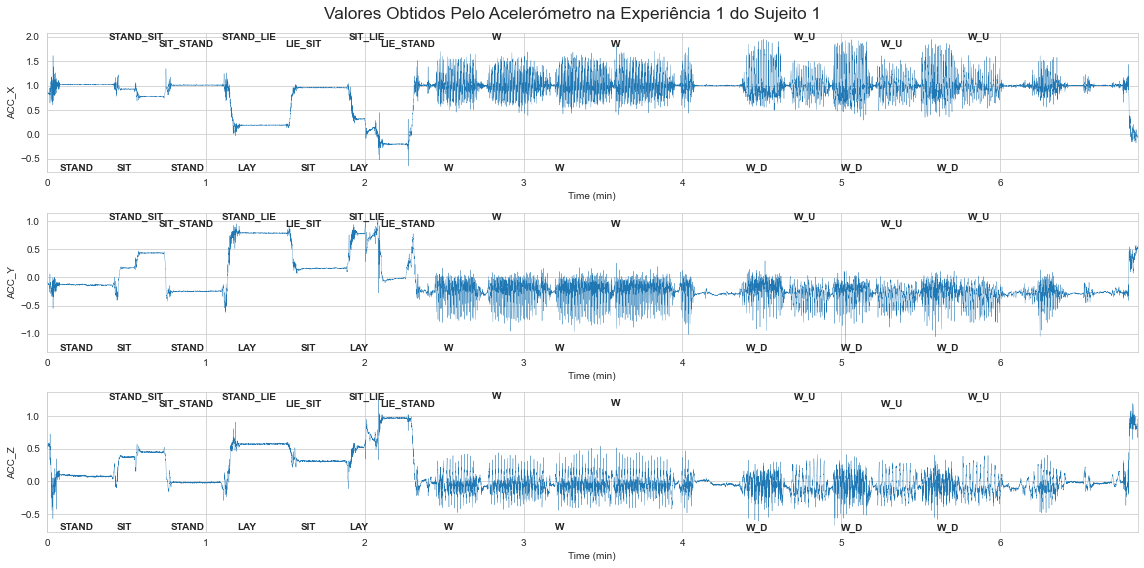

In [119]:
downintervals = [0.08, 0.44, 0.78,  1.2, 1.6, 1.9, 2.5,  3.2, 4.4, 5, 5.6]
upintervals = [0.39, 0.7, 1.1, 1.5, 1.9, 2.1, 2.8, 3.55, 4.7, 5.25, 5.8  ]

downlabels = ['STAND', 'SIT', 'STAND','LAY', 'SIT', 'LAY', 'W', 'W','W_D', 'W_D', 'W_D']
uplabels = ['STAND_SIT', 'SIT_STAND', 'STAND_LIE', 'LIE_SIT', 'SIT_LIE', 'LIE_STAND', 'W', 'W', 'W_U', 'W_U', 'W_U' ]

plot_with_labels(upintervals, downintervals, uplabels, downlabels, user1_1, 0)

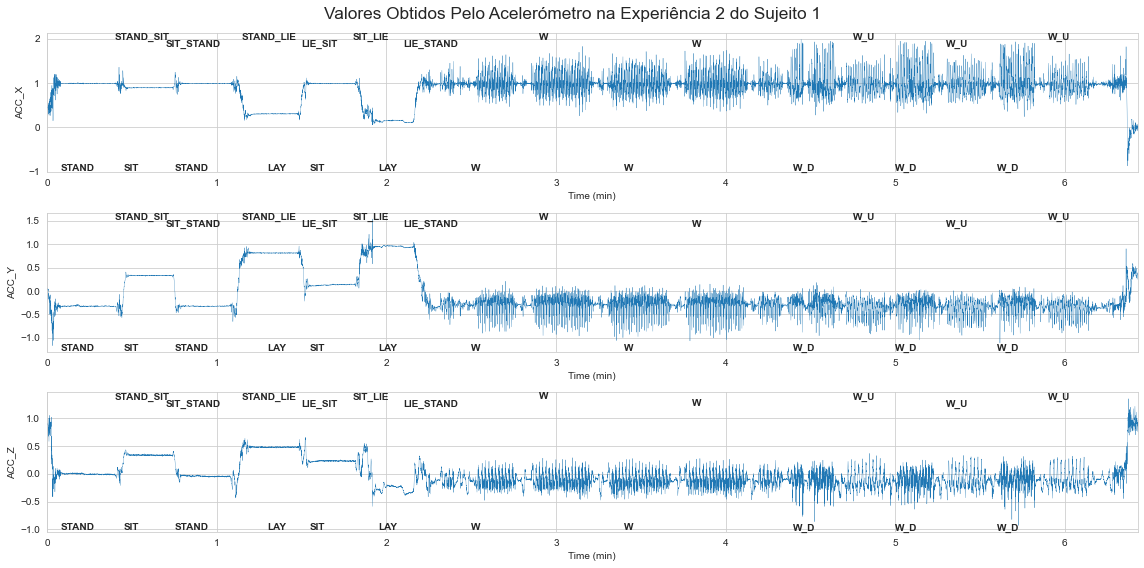

In [120]:
downintervals = [ 0.08, 0.45, 0.75, 1.3, 1.55, 1.95, 2.5, 3.4, 4.4, 5, 5.6]
upintervals = [ 0.40, 0.7, 1.15, 1.5, 1.8, 2.1, 2.9, 3.8, 4.75, 5.3, 5.9 ]

downlabels = [ 'STAND', "SIT", "STAND", "LAY", "SIT", "LAY", "W", "W", "W_D", "W_D", "W_D" ]
uplabels = [ "STAND_SIT", "SIT_STAND", "STAND_LIE", "LIE_SIT", "SIT_LIE", "LIE_STAND", "W", "W", "W_U", "W_U", "W_U" ]

plot_with_labels(upintervals, downintervals, uplabels, downlabels,user1_2, 1)

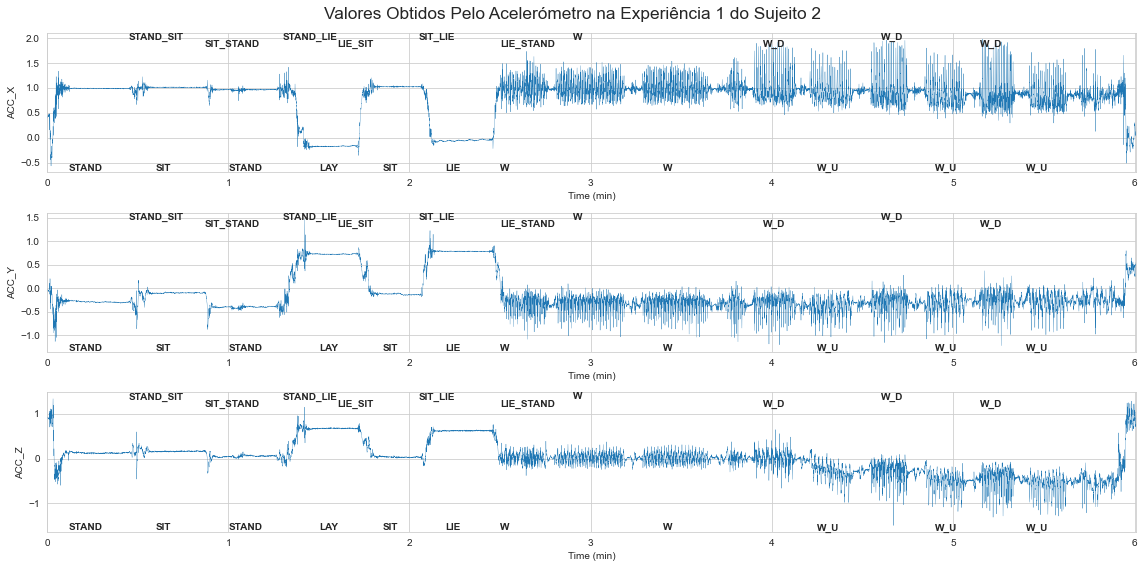

In [121]:
downintervals = [ 0.12, 0.6, 1, 1.5, 1.85, 2.2, 2.5, 3.4, 4.25, 4.9, 5.4 ]
upintervals = [ 0.45, 0.87, 1.3, 1.6, 2.05, 2.5, 2.9, 3.95, 4.6, 5.15 ]

downlabels = [ "STAND", "SIT", "STAND", "LAY", "SIT", "LIE", "W", "W", "W_U", "W_U", "W_U"]
uplabels = [ "STAND_SIT", "SIT_STAND", "STAND_LIE", "LIE_SIT", "SIT_LIE", "LIE_STAND", "W", "W_D", "W_D", "W_D"]

plot_with_labels(upintervals, downintervals, uplabels, downlabels, user2_1, 2)

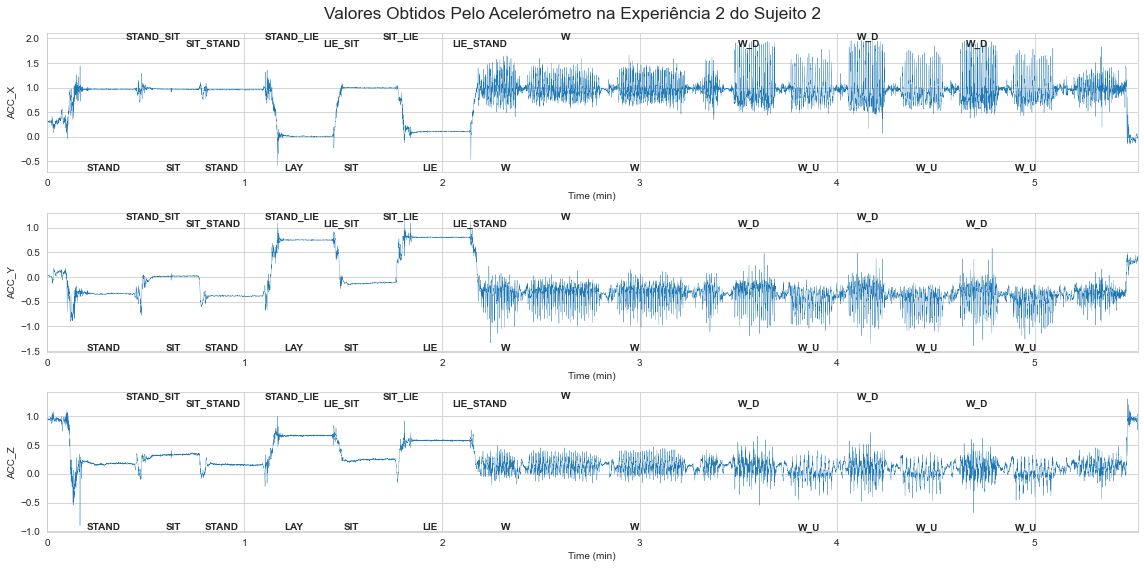

In [145]:
downintervals = [ 0.2, 0.6, 0.8, 1.2, 1.5, 1.9, 2.3, 2.95, 3.8, 4.4, 4.9 ]
upintervals = [ 0.4, 0.7, 1.1, 1.4, 1.7, 2.05, 2.6, 3.5, 4.1, 4.65 ]

downlabels = [ "STAND", "SIT", "STAND", "LAY", "SIT", "LIE", "W", "W", "W_U", "W_U", "W_U" ]
uplabels = [ "STAND_SIT",  "SIT_STAND", "STAND_LIE", "LIE_SIT", "SIT_LIE", "LIE_STAND", "W", "W_D", "W_D", "W_D" ]

plot_with_labels(upintervals, downintervals, uplabels, downlabels, user2_2, 3)

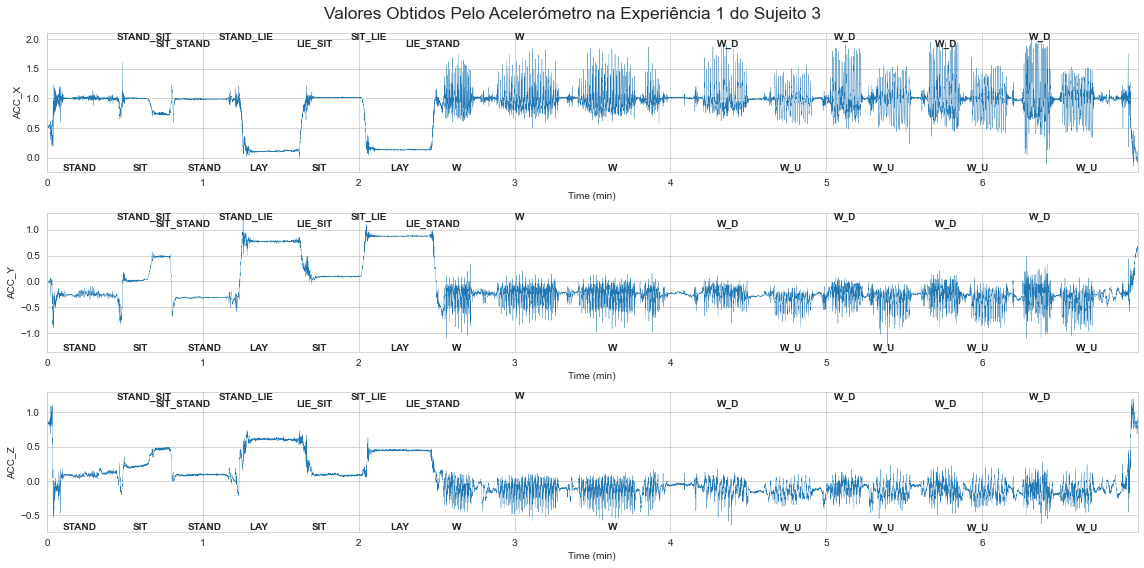

In [130]:
downintervals = [ 0.1, 0.55, 0.9, 1.3, 1.7, 2.2, 2.6, 3.6, 4.7, 5.3, 5.9, 6.6]
upintervals = [ 0.45, 0.7, 1.1, 1.6, 1.95, 2.3, 3, 4.3, 5.05, 5.7, 6.3 ]

downlabels = [ "STAND", "SIT", "STAND", "LAY", "SIT", "LAY", "W", "W", "W_U", "W_U", "W_U", "W_U"]
uplabels = [ "STAND_SIT", "SIT_STAND", "STAND_LIE", "LIE_SIT", "SIT_LIE", "LIE_STAND", "W", "W_D", "W_D", "W_D", "W_D" ]

plot_with_labels(upintervals, downintervals, uplabels, downlabels, user3_1, 4)

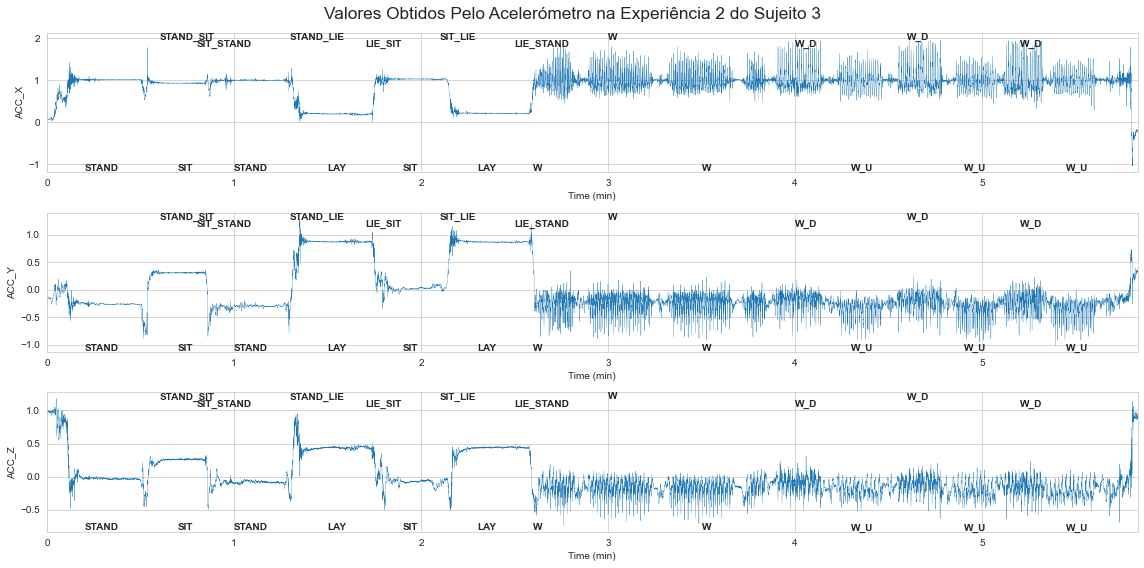

In [136]:
downintervals = [ 0.2, 0.7, 1, 1.5, 1.9, 2.3, 2.6, 3.5, 4.3, 4.9, 5.45 ]
upintervals = [ 0.6, 0.8, 1.3, 1.7, 2.1, 2.5, 3, 4, 4.6, 5.2 ]

downlabels = [ "STAND", "SIT", "STAND", "LAY", "SIT", "LAY", "W", "W", "W_U", "W_U", "W_U", "W_U"]
uplabels = [ "STAND_SIT", "SIT_STAND", "STAND_LIE", "LIE_SIT", "SIT_LIE", "LIE_STAND", "W", "W_D", "W_D", "W_D", "W_D" ]

plot_with_labels(upintervals, downintervals, uplabels, downlabels, user3_2, 5)

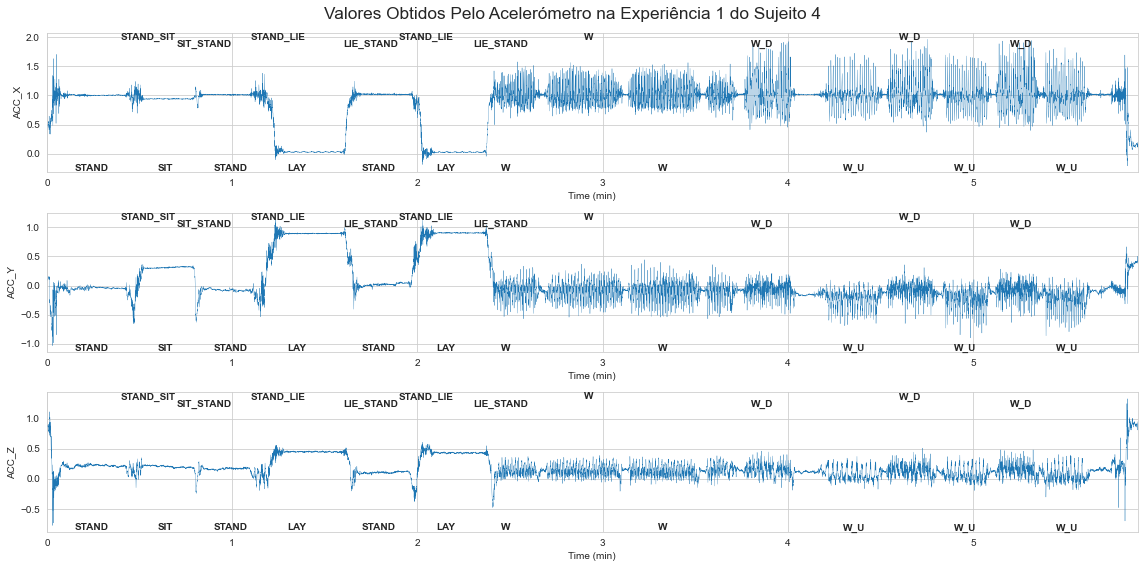

In [150]:
downintervals = [ 0.15, 0.6, 0.9, 1.3, 1.7, 2.1, 2.45, 3.3, 4.3, 4.9, 5.45 ]
upintervals = [ 0.4, 0.7, 1.1, 1.6, 1.9, 2.3, 2.9, 3.8, 4.6, 5.2 ]

downlabels = [ "STAND", "SIT", "STAND", "LAY", "STAND", "LAY", "W", "W", "W_U", "W_U", "W_U", "W_U"]
uplabels = [ "STAND_SIT", "SIT_STAND", "STAND_LIE", "LIE_STAND", "STAND_LIE", "LIE_STAND", "W", "W_D", "W_D", "W_D", "W_D" ]

plot_with_labels(upintervals, downintervals, uplabels, downlabels, user4_1, 6)

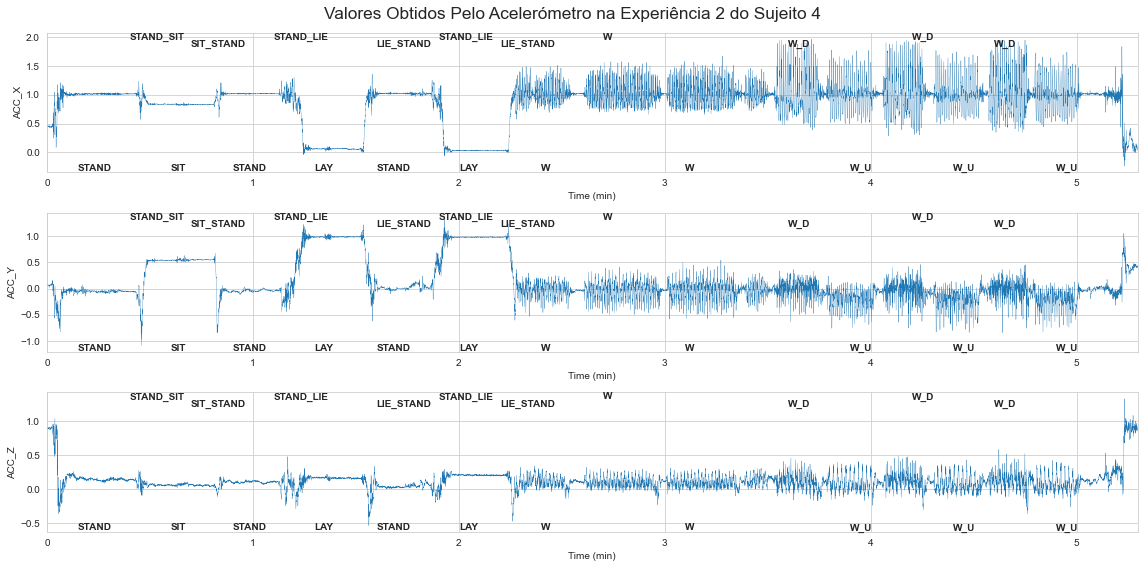

In [154]:
downintervals = [ 0.15, 0.6, 0.9, 1.3, 1.6, 2, 2.4, 3.1, 3.9, 4.4, 4.9 ]
upintervals = [ 0.4, 0.7, 1.1, 1.6, 1.9, 2.2, 2.7, 3.6, 4.2, 4.6 ]

downlabels = ["STAND", "SIT", "STAND", "LAY", "STAND", "LAY", "W", "W", "W_U", "W_U", "W_U", "W_U"]
uplabels = [  "STAND_SIT", "SIT_STAND", "STAND_LIE", "LIE_STAND", "STAND_LIE", "LIE_STAND", "W", "W_D", "W_D", "W_D", "W_D"  ]

plot_with_labels(upintervals, downintervals, uplabels, downlabels, user4_2, 7)